In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import get_data
from scipy.stats import gaussian_kde

%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["font.size"] = 14

In [2]:
# get image data as dataframe
df_image = pd.read_csv('cp_results/Image.csv')

In [3]:
# we only need a handful of columns from the df, so we just take that subset only and drop the rest
df_image = df_image[['FileName_ROI' ,'Count_Hoescht', 'Intensity_MeanIntensity_ROI', 'Intensity_TotalIntensity_ROI', 'Intensity_MedianIntensity_ROI']]
df_image.head()

,FileName_ROI,Count_Hoescht,Intensity_MeanIntensity_ROI,Intensity_TotalIntensity_ROI,Intensity_MedianIntensity_ROI
0,MFGTMP_220317120003_A01f00d3.TIF,88.0,0.007031,8570.020,0.005661
1,MFGTMP_220317120003_A01f01d3.TIF,138.0,0.012171,14834.183,0.009751
2,MFGTMP_220317120003_A01f02d3.TIF,77.0,0.007977,9722.911,0.005951
3,MFGTMP_220317120003_A01f03d3.TIF,67.0,0.009572,11666.816,0.006958
4,MFGTMP_220317120003_A01f04d3.TIF,64.0,0.009260,11285.942,0.003754


In [118]:
def get_field(fname):
    vals = get_data.parse_image_filename(fname)
    return vals['column'], vals['row'], vals['field']

def compute_roi_intensity(row):
    data_dir = 'MFGTMP_220317120003'
    rel_fp = Path(data_dir + '/' + row['FileName_ROI'])
    img_arr = get_data.file_to_nparray(rel_fp)
    return img_arr.mean()


# compute the column, row, and field of each image
df_image['column'], df_image['row'], df_image['field'] = zip(*df_image['FileName_ROI'].map(get_field))

# compute the mean roi intensity from the raw images
df_image['mean_roi'] = df_image.apply(compute_roi_intensity, axis=1)

control 2.006927890268435
H2O2 1.9402601451075614


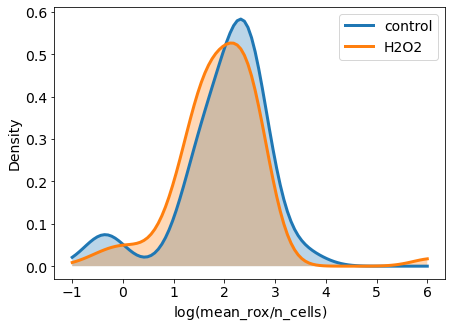

In [119]:
col_groups = [['A', 'H'], ['B', 'E']]
labels = ['control', 'H2O2']

for col_group, label  in zip(col_groups, labels):
    df_col = df_image[df_image['column'].isin(col_group)]
    metric = np.log(df_col['mean_roi'] / df_col['Count_Hoescht'])
    
    x = np.linspace(-1, 6, 100)
    kde = gaussian_kde(metric).pdf(x)
    print(label, metric.mean())

    plt.plot(x, kde, label=label, lw=3)
    plt.fill_between(x, np.zeros(x.shape), kde, alpha=0.3)

plt.xlabel(r'$\log(\mathrm{mean\_rox}/\mathrm{n\_cells})$')
plt.ylabel('Density')
plt.legend()
plt.show()

control 2.149569403441003
H2O2 2.195497966499361


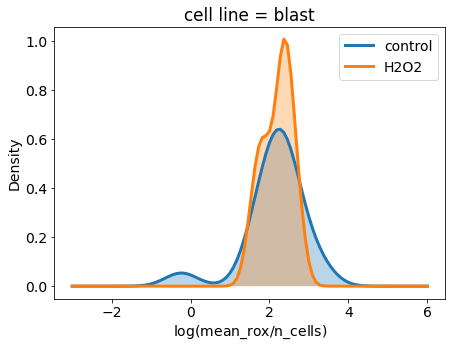

control 1.4058218560436737
H2O2 1.3195872795953505


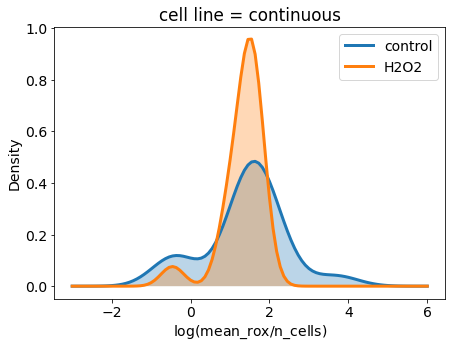

control 2.4923609125589925
H2O2 2.3056951892279725


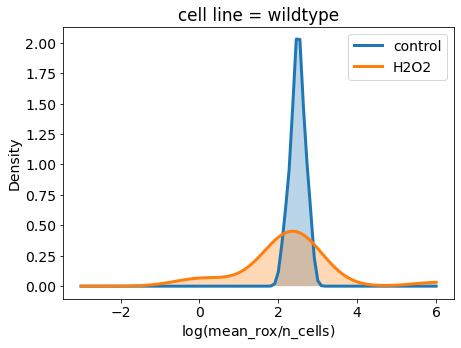

In [128]:
col_groups = [['A', 'H'], ['B', 'E']]
labels = ['control', 'H2O2']
rowmap = {1: 'blast', 2:'continuous', 3: 'wildtype'}

for row, df_row in df_image.groupby('row'):
    for col_group, label  in zip(col_groups, labels):
        df_col = df_row[df_row['column'].isin(col_group)]
        metric = np.log(df_col['mean_roi'] / df_col['Count_Hoescht'])
        
        x = np.linspace(-3, 6, 100)
        kde = gaussian_kde(metric).pdf(x)
        print(label, metric.mean())

        plt.plot(x, kde, label=label, lw=3)
        plt.fill_between(x, np.zeros(x.shape), kde, alpha=0.3)

    plt.title(f'cell line = {rowmap[row]}')
    plt.xlabel(r'$\log(\mathrm{mean\_rox}/\mathrm{n\_cells})$')
    plt.ylabel('Density')
    plt.legend()
    plt.show()